In [3]:
import numpy as np
import lammps_logfile

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

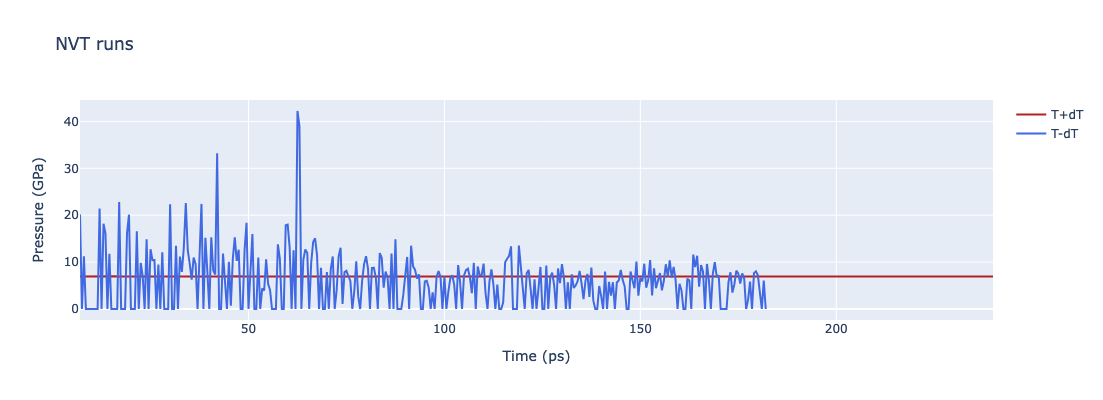

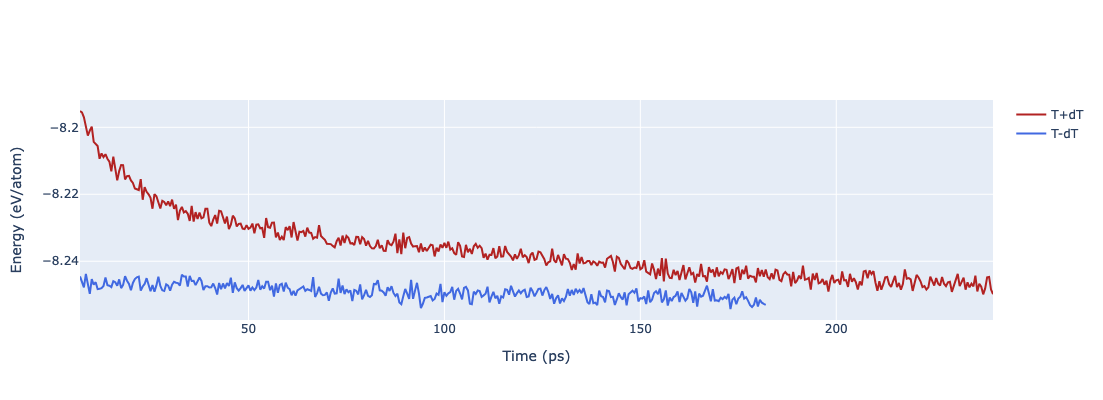

In [13]:
vr      = ".94" 
t       = 5100
dT      = 200

tHigh   = t+dT
tLow    = t-dT

# flogThigh = "./offsets/vol-"+vr+"-"+str(tHigh)+"K-log.out"
# flogTlow = "./offsets/vol-"+vr+"-"+str(tLow)+"K-log.out"

# logThigh = lammps_logfile.File(flogThigh)
# logTlow = lammps_logfile.File(flogTlow)

logThigh = lammps_logfile.File("log.out")
logTlow = lammps_logfile.File("log-rst.out")

natoms = 27000

xtag = "Time"
yt1 = "Press"
yt2 = "PotEng"

xx = logThigh.get(xtag)
y1Thigh = 10000*logThigh.get("v_us")/10000
y2Thigh = logThigh.get("PotEng")/natoms

y1Tlow = 10000*logTlow.get("v_us")/10000
y2Tlow = logTlow.get("PotEng")/natoms

fig = go.Figure()
fig.add_trace(go.Scatter(x=xx[10:], y=y1Thigh[10:],mode='lines',name='T+dT',line=dict(color='firebrick', width=2)))
fig.add_trace(go.Scatter(x=xx[10:], y=y1Tlow[10:],mode='lines',name='T-dT',line=dict(color='royalblue', width=2)))
fig.update_layout(title='NVT runs',xaxis_title='Time (ps)',yaxis_title='Pressure (GPa)',width=800, height=400)
fig.show()

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=xx[10:], y=y2Thigh[10:], mode='lines',name='T+dT',line=dict(color='firebrick', width=2)))
fig2.add_trace(go.Scatter(x=xx[10:], y=y2Tlow[10:],mode='lines',name='T-dT',line=dict(color='royalblue', width=2)))
fig2.update_layout(xaxis_title='Time (ps)',yaxis_title='Energy (eV/atom)',width=800, height=400)
fig2.show()

